In [6]:
import wfdb
import scipy
import numpy as np

from matplotlib import pyplot as plt
import math
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

ImportError: numpy.core.multiarray failed to import

In [2]:
samp_start = 1300+700
samp_end = 3200+700
patient_1 = wfdb.rdrecord('..//01.Dataset/117/s0291lre', channels=[1], sampfrom=samp_start, sampto=samp_end)
patient_2 = wfdb.rdrecord('..//01.Dataset/116/s0302lre', channels=[1], sampfrom=samp_start, sampto=samp_end)
signal_1 = patient_1.p_signal[:, 0]
signal_2 = patient_2.p_signal[:, 0]

In [ ]:
print(len(signal_1))
print(len(signal_2))

1900
1900


In [ ]:
#apply AC and DCT 
def nonFiducial(signal):
    Auto_corr=sm.tsa.acf(signal,nlags=1900)
    
    s1=Auto_corr[0:190]

    DcT=scipy.fftpack.dct(s1,type=2)

    # take only non zero signal
    dct = DcT[0:20]
    
    components=[signal,Auto_corr,s1,DcT,dct]
    return components[4]

In [ ]:
arr_components1 = nonFiducial(signal_1)

arr_components2 = nonFiducial(signal_2)

arr_components = arr_components1 + arr_components2

feature1 =  arr_components1[4]

print(len(feature1))

20


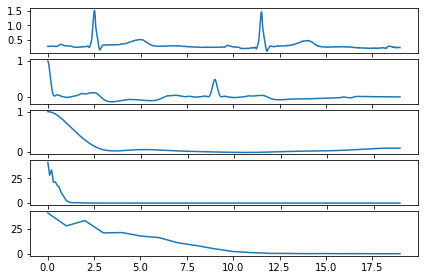

In [ ]:
fig , ax = plt.subplots(5)

row= 0 
for i in range(0,5):
    ax[row].plot(arr_components1[i])
    ax[row].set_title("")
    row+=1
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0)

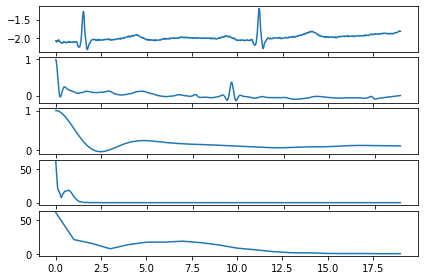

In [ ]:
fig , ax = plt.subplots(5)

row= 0 
for i in range(0,5):
    ax[row].plot(arr_components2[i])
    ax[row].set_title("")
    row+=1
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0)

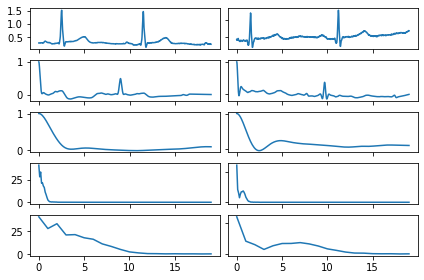

In [ ]:
fig , ax = plt.subplots(5,2)

row= 0 
col = 0
count =0
for i in range(0,10):
    ax[row,col].plot(arr_components[i])
    ax[row,col].set_title("")
    count+=1 
    row+=1
    if(count%5 == 0):
        col+=1
        row=0
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0.5,w_pad=0.5)